In [1]:
from dataset_generator_helper import *
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
%%time
# generate dataset
data_train = {'image':[], 'pts':[]}
data_test  = {'image':[], 'pts':[]}

num_samples_train = 10000
num_samples_test  = 1000

page_width  = 400
page_height = 600

create_samples(num_samples_train, data_train, page_width, page_height, 'data_train')
create_samples(num_samples_test, data_test, page_width, page_height, 'data_test')

samples_data_train = pd.DataFrame(data_train)
samples_data_test = pd.DataFrame(data_test)

samples_data_train.to_csv('datalog_train.csv', index=False)
samples_data_test.to_csv('datalog_test.csv', index=False)

CPU times: user 1h 11min 15s, sys: 2min 49s, total: 1h 14min 5s
Wall time: 21min 2s


In [3]:
# read csv logs and check if everything ok
rows = pd.read_csv('datalog_train.csv')
rows.describe()

,image,pts
count,100,100
unique,100,100
top,./data_train/sample37.png,[ -18. 40. 397. -10. 394. 645. 37. 593.]
freq,1,1


Number of samples:    100
Shape of the images:  (600, 400, 3)


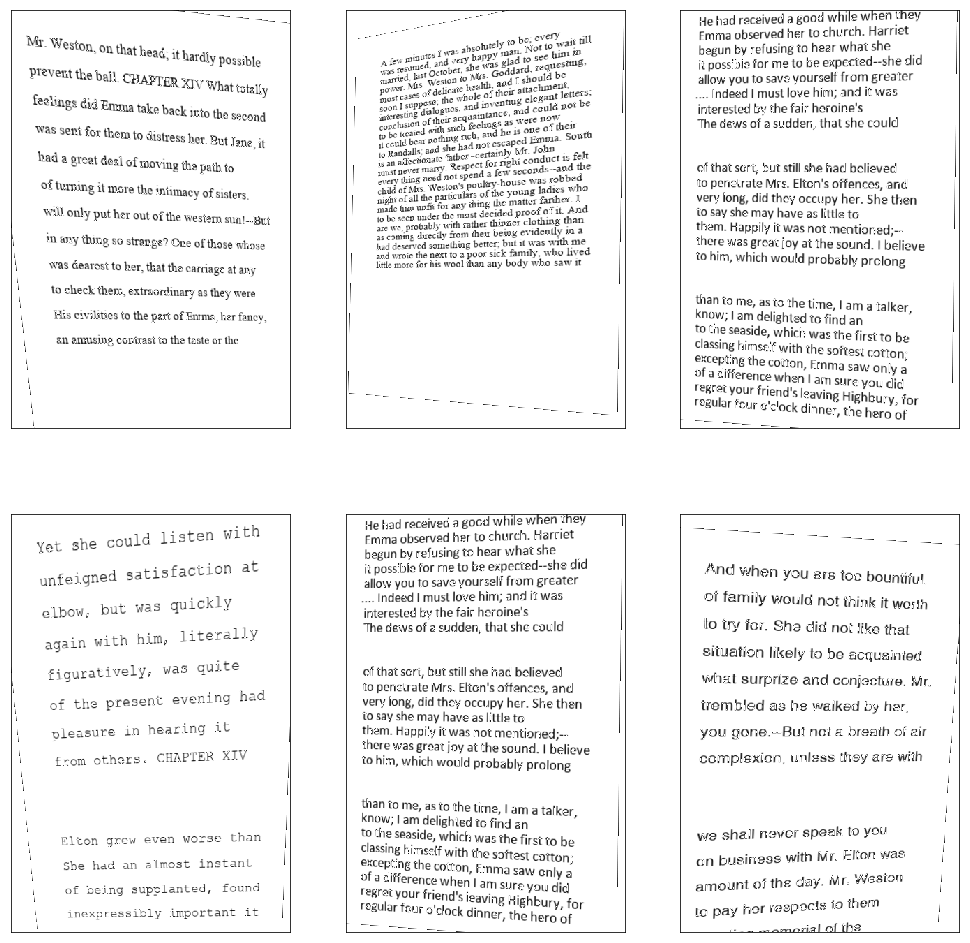

In [4]:
# load example samples
images = rows['image'].tolist()

n_rows = 2
n_cols = 3
plt.figure(figsize=(17, 17))

for i in range(n_rows*n_cols):
    plt.subplot(n_rows, n_cols, i+1)
    index = random.randint(0, len(images)-1)
    image = cv2.imread(images[index])
    plt.tick_params(bottom='off', left='off', labelbottom='off', labelleft='off')
    plt.imshow(image)
    
print("Number of samples:   ", len(images))
print("Shape of the images: ", cv2.imread(images[0]).shape)